In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from positionCorrection import positionCorrection as correct
from mpl_toolkits.mplot3d import Axes3D
import math

In [1]:
snapData = np.genfromtxt('data/data_spacing.txt')
snapshots = snapData[:,0]
scale = snapData[:,1]
redshift = snapData[:,2]


NameError: name 'np' is not defined

In [3]:
snaps = np.array([135, 131, 126, 117, 103, 93, 84, 75])
reds = np.array([redshift[snapshots == i][0] for i in snaps])
scales = 1/(1+reds)

primFiles = ['data_primaries_'+str(i)+'.csv' for i in snaps]
secoFiles = ['data_secondaries_'+str(i)+'.csv' for i in snaps]

pd.read_csv(secoFiles[0])[0:10]
#print([len(pd.read_csv(primFiles[i])) for i in range(len(snaps))])

# print(snaps)
# print(reds)
# print(scales)
# print([len(pd.read_csv(primFiles[i])) for i in range(len(snaps))])

,Group Number,Subhalo ID,Redshift,Mass at z=0,Max Mass,Max Mass Snap,Redshift at Max Mass,Rvir at z=0,Rvir at Max Mass,Pos x,Pos y,Pos z,Vel x,Vel y,Vel z,Escape Speed z=0,Escape Speed Max Mass,AM Stellar Mass
0,2430.0,624506.0,0.0,13.942057,15.423656,131.0,0.048524,134.898454,137.656698,64913.730469,72897.617188,46550.136719,70.240196,-1.176553,-212.714310,133.711472,138.064174,0.227367
1,2440.0,624891.0,0.0,21.038684,21.038684,135.0,0.000000,154.728699,154.728699,64414.042969,66188.351562,37334.441406,79.471931,-68.301575,188.076065,124.854669,137.769866,0.489338
2,2558.0,629560.0,0.0,24.288421,24.715602,134.0,0.009522,162.317164,162.826347,10421.964844,71323.492188,7523.081543,177.162109,151.676804,-5.727583,130.113520,134.366632,0.644677
3,2696.0,634749.0,0.0,12.284474,21.573414,132.0,0.033724,129.325313,154.570095,38066.519531,33855.480469,1952.893677,-59.210819,-52.816223,-231.186432,141.875212,146.960099,0.468627
4,2724.0,635740.0,0.0,28.676808,28.676808,135.0,0.000000,171.556938,171.556938,33988.386719,59353.902344,44731.007812,-98.837021,236.054871,32.974998,127.037499,132.788032,0.855825
5,2803.0,638448.0,0.0,16.229886,24.687775,112.0,0.328830,141.906788,150.981914,8595.202148,894.001465,39024.324219,-89.301567,187.051041,-83.222046,126.725533,134.287392,0.337542
6,2853.0,640217.0,0.0,9.095655,10.080128,133.0,0.023974,116.997344,120.265571,19210.091797,21410.617188,46904.957031,-63.809284,151.038925,6.649425,127.864369,131.730973,0.096169
7,2881.0,641151.0,0.0,18.353759,29.983924,100.0,0.575980,147.844903,155.014615,10559.490234,31355.458984,70541.867188,17.066425,228.767639,111.531136,161.911801,177.045049,0.364152
8,2938.0,643040.0,0.0,9.839462,12.896666,134.0,0.009522,120.103355,131.087144,57838.101562,62079.148438,50381.531250,263.703766,-30.609827,-110.041328,102.007974,118.577016,0.173119
9,3004.0,645221.0,0.0,7.784780,23.897342,117.0,0.243540,111.082794,151.931041,8055.973633,18282.712891,63698.984375,442.592865,156.507889,103.136993,168.182589,182.894003,0.363578


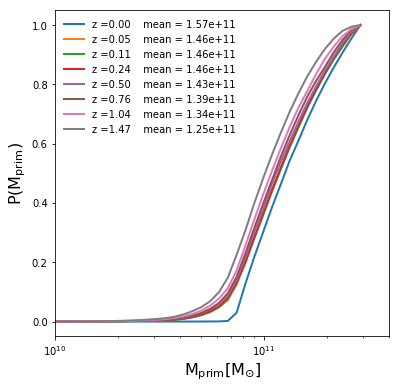

In [4]:
##################################################################
# Plotting the mass distribution of the primaries                #
##################################################################

parameters = np.array([pd.read_csv(primFiles[i])['Mass at z=0'] for i in range(len(snaps))])*1e10
mins = [np.min(parameters[i]) for i in range(len(snaps))]
maxs = [np.max(parameters[i]) for i in range(len(snaps))]

min, max = np.min(mins), np.max(maxs)
means = [np.mean(parameters[i]) for i in range(len(snaps))]

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
for i in range(len(snaps)):
    n, edge = np.histogram(parameters[i], bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights = np.ones_like(parameters[i])/float(len(parameters[i])))
    plt.plot(edge[0:-1],np.cumsum(n),label='z =''%.2f    mean = %.2e' % (reds[i], means[i]), lw=2)
plt.xscale("log")
plt.xlabel(r'$\rm M_{prim} [M_{\odot}]$', fontsize=16)
plt.ylabel(r'P($\rm M_{prim}$)', fontsize=16)
plt.legend(loc='upper left', frameon=False)
plt.xlim(1*10**10,4e11)
plt.savefig('plots_dwarfPairs/primaryMassDistribution.pdf')
plt.show()


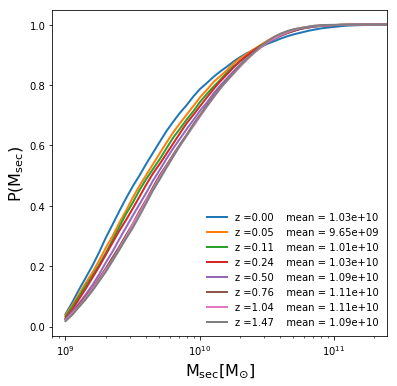

In [5]:
##################################################################
# Plotting the mass distribution of the secondaries              #
##################################################################
parameters = np.array([pd.read_csv(secoFiles[i])['Mass at z=0'] for i in range(len(snaps))])*1e10
mins = [np.min(parameters[i]) for i in range(len(snaps))]
maxs = [np.max(parameters[i]) for i in range(len(snaps))]

min, max = np.min(mins), np.max(maxs)
means = [np.mean(parameters[i]) for i in range(len(snaps))]

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
for i in range(len(snaps)):
    n, edge = np.histogram(parameters[i], bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights = np.ones_like(parameters[i])/float(len(parameters[i])))
    plt.plot(edge[0:-1],np.cumsum(n),label='z =''%.2f    mean = %.2e' % (reds[i], means[i]), lw=2)
plt.xscale("log")
plt.xlabel(r'$\rm M_{sec} [M_{\odot}]$', fontsize=16)
plt.ylabel(r'P($\rm M_{sec}$)', fontsize=16)
plt.legend(loc='lower right', frameon=False)
plt.xlim(0.8*10**9,2.5*10**11)
plt.savefig('plots_dwarfPairs/secondaryMassDistribution.pdf')
plt.show()

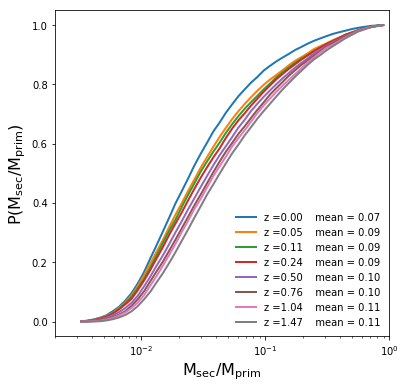

In [6]:
##################################################################
# Plotting the mass ratios between the secondaries and primaries #
##################################################################
parameters = np.array([pd.read_csv(secoFiles[i])['Mass at z=0']/pd.read_csv(primFiles[i])['Mass at z=0'] for i in range(len(snaps))])
mins = [np.min(parameters[i]) for i in range(len(snaps))]
maxs = [np.max(parameters[i]) for i in range(len(snaps))]

min, max = np.min(mins), np.max(maxs)
means = [np.mean(parameters[i]) for i in range(len(snaps))]

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
for i in range(len(snaps)):
    n, edge = np.histogram(parameters[i], bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights = np.ones_like(parameters[i])/float(len(parameters[i])))
    plt.plot(edge[0:-1],np.cumsum(n),label='z =''%.2f    mean = %.2f' % (reds[i], means[i]), lw=2)
plt.xscale("log")
plt.xlim(2*10**(-3), 1)
plt.xlabel(r'$\rm M_{sec}/M_{prim}$', fontsize=16)
plt.ylabel(r'P($\rm M_{sec}/M_{prim}$)', fontsize=16)
plt.legend(loc='lower right', frameon=False)
plt.savefig('plots_dwarfPairs/massRatioDistribution.pdf')
plt.show()


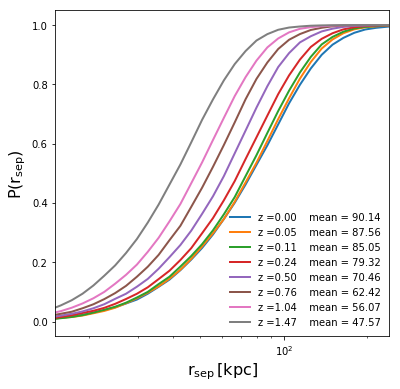

In [7]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
def correctedSeps(prims, secos, scale):
    primaryPos = np.column_stack([prims['Pos x'],prims['Pos y'],prims['Pos z']])
    secondaryPos = np.column_stack([secos['Pos x'],secos['Pos y'],secos['Pos z']])
    correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(primaryPos,secondaryPos))])*scale
    scaledSeparation = correctedSeparations/prims['Rvir at Max Mass'].values
    return correctedSeparations

number = range(len(snaps))

parameters = np.array([correctedSeps(pd.read_csv(primFiles[i]),pd.read_csv(secoFiles[i]), scales[i]) for i in number])
mins = [np.min(parameters[i]) for i in range(len(parameters))]
maxs = [np.max(parameters[i]) for i in range(len(parameters))]

min, max = np.min(mins), np.max(maxs)
means = [np.mean(parameters[i]) for i in range(len(parameters))]

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
for i in range(len(parameters)):
    n, edge = np.histogram(parameters[i], bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights = np.ones_like(parameters[i])/float(len(parameters[i])))
    plt.plot(edge[0:-1],np.cumsum(n),label='z =''%.2f    mean = %.2f' % (reds[i], means[i]), lw=2)
plt.xscale("log")
plt.xlim(15,240)
plt.xlabel(r'$\rm r_{sep}\, [kpc]$', fontsize=16)
plt.ylabel(r'P($\rm r_{sep}$)', fontsize=16)
plt.legend(loc='lower right', frameon=False)
plt.savefig('plots_dwarfPairs/separationDistribution.pdf')
plt.show()


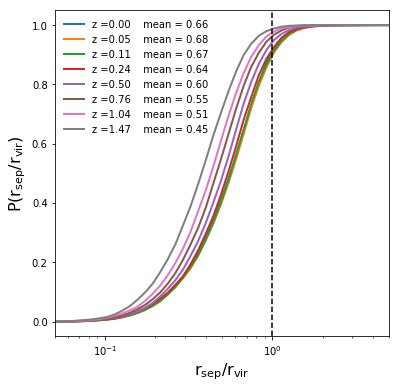

In [8]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
def scaledSeparations(prims, secos, scale):
    primaryPos = np.column_stack([prims['Pos x'],prims['Pos y'],prims['Pos z']])
    secondaryPos = np.column_stack([secos['Pos x'],secos['Pos y'],secos['Pos z']])
    correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(primaryPos,secondaryPos))])*scale
    scaledSeparation = correctedSeparations/prims['Rvir at Max Mass'].values
    return scaledSeparation

number = range(len(snaps))

parameters = np.array([scaledSeparations(pd.read_csv(primFiles[i]),pd.read_csv(secoFiles[i]), scales[i]) for i in number])
mins = [np.min(parameters[i]) for i in range(len(parameters))]
maxs = [np.max(parameters[i]) for i in range(len(parameters))]

min, max = np.min(mins), np.max(maxs)
means = [np.mean(parameters[i]) for i in range(len(parameters))]

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
for i in range(len(parameters)):
    n, edge = np.histogram(parameters[i], bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights = np.ones_like(parameters[i])/float(len(parameters[i])))
    plt.plot(edge[0:-1],np.cumsum(n),label='z =''%.2f    mean = %.2f' % (reds[i], means[i]), lw=2)
plt.xscale("log")
plt.xlim(0.05,5)
plt.xlabel(r'$\rm r_{sep}/r_{vir}$', fontsize=16)
plt.ylabel(r'P($\rm r_{sep}/r_{vir}$)', fontsize=16)
plt.legend(loc='upper left', frameon=False)
plt.axvline(1,color='black',linestyle='dashed')
plt.savefig('plots_dwarfPairs/scaledSeparationDistribution.pdf')
plt.show()


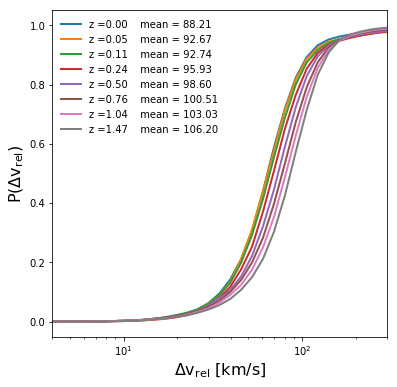

In [9]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
def relativeVelocities(filePrim, fileSeco):
    primaryVel = np.column_stack([filePrim['Vel x'],filePrim['Vel y'],filePrim['Vel z']])
    secondaryVel = np.column_stack([fileSeco['Vel x'],fileSeco['Vel y'],fileSeco['Vel z']])
    relativeVelocity = np.array([np.linalg.norm(i) for i in (primaryVel-secondaryVel)])
    escapes = fileSeco['Escape Speed z=0'].values
    scaledVelocity = relativeVelocity/escapes
    return relativeVelocity

parameters = np.array([relativeVelocities(pd.read_csv(primFiles[i]),pd.read_csv(secoFiles[i])) for i in range(len(snaps))])
mins = [np.min(parameters[i]) for i in range(len(snaps))]
maxs = [np.max(parameters[i]) for i in range(len(snaps))]

min, max = np.min(mins), np.max(maxs)
means = [np.mean(parameters[i]) for i in range(len(snaps))]

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
for i in range(len(snaps)):
    n, edge = np.histogram(parameters[i], bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights = np.ones_like(parameters[i])/float(len(parameters[i])))
    plt.plot(edge[0:-1],np.cumsum(n),label='z =''%.2f    mean = %.2f' % (reds[i], means[i]), lw=2)
plt.xscale("log")
plt.xlim(4,300)
plt.xlabel(r'$\rm \Delta v_{rel}$ [km/s]', fontsize=16)
plt.ylabel(r'P($\rm \Delta v_{rel}$)', fontsize=16)
plt.legend(loc='upper left', frameon=False)
plt.savefig('plots_dwarfPairs/velocityDistribution.pdf')
plt.show()



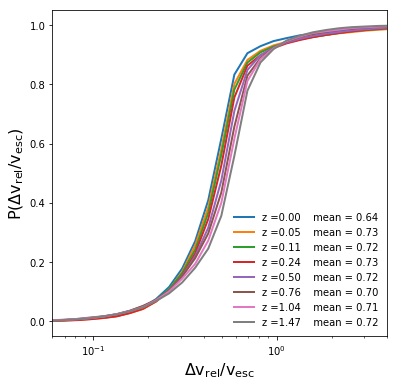

In [10]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
def scaledVelocities(filePrim, fileSeco):
    primaryVel = np.column_stack([filePrim['Vel x'],filePrim['Vel y'],filePrim['Vel z']])
    secondaryVel = np.column_stack([fileSeco['Vel x'],fileSeco['Vel y'],fileSeco['Vel z']])
    relativeVelocity = np.array([np.linalg.norm(i) for i in (primaryVel-secondaryVel)])
    escapes = fileSeco['Escape Speed z=0'].values
    scaledVelocity = relativeVelocity/escapes
    return scaledVelocity

parameters = np.array([scaledVelocities(pd.read_csv(primFiles[i]),pd.read_csv(secoFiles[i])) for i in range(len(snaps))])
mins = [np.min(parameters[i]) for i in range(len(snaps))]
maxs = [np.max(parameters[i]) for i in range(len(snaps))]

min, max = np.min(mins), np.max(maxs)
means = [np.mean(parameters[i]) for i in range(len(snaps))]

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
for i in range(len(snaps)):
    n, edge = np.histogram(parameters[i], bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights = np.ones_like(parameters[i])/float(len(parameters[i])))
    plt.plot(edge[0:-1],np.cumsum(n),label='z =''%.2f    mean = %.2f' % (reds[i], means[i]), lw=2)
plt.xscale("log")
plt.xlim(6e-2,4)
plt.xlabel(r'$\rm \Delta v_{rel}/v_{esc}$', fontsize=16)
plt.ylabel(r'P($\rm \Delta v_{rel}/v_{esc}$)', fontsize=16)
plt.legend(loc='lower right', frameon=False)
plt.savefig('plots_dwarfPairs/scaledVelocityDistribution.pdf')
plt.show()



In [11]:
#######################################
# Mass cuts for pairs, minor mergers! #
#######################################
kept = []
pairs=[]
numberSubhaloPairs = []
numberLMCs = []
numberPairs_Mass = []
numberPairs_Total = []
for i in range(len(snaps)):
    ####################
    # first mass cuts! #
    ####################
    prims = pd.read_csv(primFiles[i])
    secos = pd.read_csv(secoFiles[i])
    numberSubhaloPairs.append(len(prims))

    # defining the mass ratio according to stellar mass
    massRatio = secos['AM Stellar Mass']/prims['AM Stellar Mass'] 
    
    #LMC stellar mass 1-5e9 Msun
    LMCmassCut = np.logical_and(0.5 >= prims['AM Stellar Mass'], prims['AM Stellar Mass'] >= 0.1)
    numberLMCs.append(len(prims[LMCmassCut]))
    
    #SMC stellar mass > 2e8
    SMCmassCut = (0.02 <= secos['AM Stellar Mass'])
    
    #SMC/LMC stellar mass ratio between 1/15 and 1/5
    SMCratioCut = np.logical_and(massRatio > 1/15, massRatio < 1/5)
    
    #creating mass mask for pairs that pass the above 3 criteria
    massCuts = LMCmassCut&SMCratioCut&SMCmassCut
    
    #creating mask for pairs that have LMCs, but do not have an LMC-like companion
    cutNoSMCs = LMCmassCut&~SMCratioCut&~SMCmassCut
    
    #creating 
    prims_massCut = prims[massCuts]
    secos_massCut = secos[massCuts]
    numberPairs_Mass.append(len(prims_massCut))
    
    # finding scaled separation for each halo pair
    primaryPos = np.column_stack([prims_massCut['Pos x'],prims_massCut['Pos y'],prims_massCut['Pos z']])
    secondaryPos = np.column_stack([secos_massCut['Pos x'],secos_massCut['Pos y'],secos_massCut['Pos z']])
    correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(primaryPos,secondaryPos))])
    scaledSeparation = correctedSeparations/prims_massCut['Rvir at Max Mass'].values

    # finding scaled velocity for each halo pair
    primaryVel = np.column_stack([prims_massCut['Vel x'],prims_massCut['Vel y'],prims_massCut['Vel z']])
    secondaryVel = np.column_stack([secos_massCut['Vel x'],secos_massCut['Vel y'],secos_massCut['Vel z']])
    relativeVelocity = np.array([np.linalg.norm(i) for i in (primaryVel-secondaryVel)])
    scaledVelocity = relativeVelocity/secos_massCut['Escape Speed z=0'].values

    # creating masks to include only "bound" halos
    PosCut = (scaledSeparation <= 1)
    VelCut = (scaledVelocity <= 1)
    
    # applying bound cuts to 
    posVelCut = PosCut&VelCut
    prims_allCut = prims_massCut[posVelCut]
    secos_allCut = secos_massCut[posVelCut]
    numberPairs_Total.append(len(prims_allCut))
    
    LMCFileToSave = 'data_LMC_boundAnalogs_'+str(snaps[i])+'.csv'
    SMCFileToSave = 'data_SMC_boundAnalogs_'+str(snaps[i])+'.csv'
    
    cols = ['Group Number', 'Subhalo ID','Redshift', 'Mass at z=0', 'Max Mass',
           'Max Mass Snap', 'Redshift at Max Mass', 'Rvir at z=0', 'Rvir at Max Mass', 'Pos x',
           'Pos y', 'Pos z', 'Vel x', 'Vel y', 'Vel z', 'AM Stellar Mass']
    SMCCols = ['Group Number', 'Subhalo ID','Redshift', 'Mass at z=0', 'Max Mass',
           'Max Mass Snap', 'Redshift at Max Mass', 'Rvir at z=0', 'Rvir at Max Mass', 'Pos x',
           'Pos y', 'Pos z', 'Vel x', 'Vel y', 'Vel z', 'AM Stellar Mass','Escape Speed z=0','Escape Speed Max Mass']
    
    primsData = pd.DataFrame(data = prims_allCut, columns=cols)
    primsData.to_csv(LMCFileToSave,index=False,header=True)
    
    secosData = pd.DataFrame(data = secos_allCut, columns=SMCCols)
    secosData.to_csv(SMCFileToSave,index=False,header=True)
    

In [12]:
#######################################
# Mass cuts for pairs, minor mergers! #
#######################################
kept = []
pairs=[]
numberSubhaloPairs = []
numberLMCs = []
numberPairs_Mass = []
numberPairs_Total = []
for i in range(len(snaps)):
    ####################
    # first mass cuts! #
    ####################
    prims = pd.read_csv(primFiles[i])
    secos = pd.read_csv(secoFiles[i])
    numberSubhaloPairs.append(len(prims))

    # defining the mass ratio according to stellar mass
    massRatio = secos['AM Stellar Mass']/prims['AM Stellar Mass'] 
    
    #LMC stellar mass 1-5e9 Msun
    LMCmassCut = np.logical_and(0.5 >= prims['AM Stellar Mass'], prims['AM Stellar Mass'] >= 0.1)
    numberLMCs.append(len(prims[LMCmassCut]))
    
    #SMC/LMC stellar mass ratio between 1/15 and 1/5
    SMCratioCut = np.logical_and(massRatio > 1/4, massRatio < 1)
    
    #creating mass mask for pairs that pass the above 3 criteria
    massCuts = LMCmassCut&SMCratioCut&SMCmassCut
    
    #creating mask for pairs that have LMCs, but do not have an LMC-like companion
    cutNoSMCs = LMCmassCut&~SMCratioCut&~SMCmassCut
    
    #creating 
    prims_massCut = prims[massCuts]
    secos_massCut = secos[massCuts]
    numberPairs_Mass.append(len(prims_massCut))
    
    LMCFileToSave = 'data_LMC_majorMergers_'+str(snaps[i])+'.csv'
    SMCFileToSave = 'data_secondary_majorMergers_'+str(snaps[i])+'.csv'
    
    cols = ['Group Number', 'Subhalo ID','Redshift', 'Mass at z=0', 'Max Mass',
           'Max Mass Snap', 'Redshift at Max Mass', 'Rvir at z=0', 'Rvir at Max Mass', 'Pos x',
           'Pos y', 'Pos z', 'Vel x', 'Vel y', 'Vel z', 'AM Stellar Mass']
    SMCCols = ['Group Number', 'Subhalo ID','Redshift', 'Mass at z=0', 'Max Mass',
           'Max Mass Snap', 'Redshift at Max Mass', 'Rvir at z=0', 'Rvir at Max Mass', 'Pos x',
           'Pos y', 'Pos z', 'Vel x', 'Vel y', 'Vel z', 'AM Stellar Mass','Escape Speed z=0','Escape Speed Max Mass']
    
    primsData = pd.DataFrame(data = prims_massCut, columns=cols)
    primsData.to_csv(LMCFileToSave,index=False,header=True)
    
    secosData = pd.DataFrame(data = secos_massCut, columns=SMCCols)
    secosData.to_csv(SMCFileToSave,index=False,header=True)
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [13]:
#######################################
# Mass cuts for pairs, minor mergers! #
#######################################
kept = []
pairs=[]
numberSubhaloPairs = []
numberLMCs = []
numberPairs_Mass = []
numberPairs_Total = []
for i in range(len(snaps)):
    ####################
    # first mass cuts! #
    ####################
    prims = pd.read_csv(primFiles[i])
    secos = pd.read_csv(secoFiles[i])
    numberSubhaloPairs.append(len(prims))

    # defining the mass ratio according to stellar mass
    massRatio = secos['AM Stellar Mass']/prims['AM Stellar Mass'] 
    
    #LMC stellar mass 1-5e9 Msun
    LMCmassCut = np.logical_and(0.5 >= prims['AM Stellar Mass'], prims['AM Stellar Mass'] >= 0.1)
    numberLMCs.append(len(prims[LMCmassCut]))
    
    #SMC stellar mass > 2e8
    SMCmassCut = (0.02 <= secos['AM Stellar Mass'])
    
    #SMC/LMC stellar mass ratio between 1/15 and 1/5
    SMCratioCut = np.logical_and(massRatio > 1/15, massRatio < 1/5)
    
    #creating mass mask for pairs that pass the above 3 criteria
    massCuts = LMCmassCut&SMCratioCut&SMCmassCut
    
    #creating mask for pairs that have LMCs, but do not have an LMC-like companion
    cutNoSMCs = LMCmassCut&~SMCratioCut&~SMCmassCut
    
    #creating 
    prims_massCut = prims[massCuts]
    secos_massCut = secos[massCuts]
    numberPairs_Mass.append(len(prims_massCut))
    
    # finding scaled separation for each halo pair
    primaryPos = np.column_stack([prims_massCut['Pos x'],prims_massCut['Pos y'],prims_massCut['Pos z']])
    secondaryPos = np.column_stack([secos_massCut['Pos x'],secos_massCut['Pos y'],secos_massCut['Pos z']])
    correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(primaryPos,secondaryPos))])
    scaledSeparation = correctedSeparations/prims_massCut['Rvir at Max Mass'].values

    # finding scaled velocity for each halo pair
    primaryVel = np.column_stack([prims_massCut['Vel x'],prims_massCut['Vel y'],prims_massCut['Vel z']])
    secondaryVel = np.column_stack([secos_massCut['Vel x'],secos_massCut['Vel y'],secos_massCut['Vel z']])
    relativeVelocity = np.array([np.linalg.norm(i) for i in (primaryVel-secondaryVel)])
    scaledVelocity = relativeVelocity/secos_massCut['Escape Speed z=0'].values

    # creating masks to include only "bound" halos
    PosCut = (scaledSeparation <= 1)
    VelCut = (scaledVelocity <= 1)
    
    # applying bound cuts to 
    posVelCut = PosCut&VelCut
    prims_allCut = prims_massCut[posVelCut]
    secos_allCut = secos_massCut[posVelCut]
    numberPairs_Total.append(len(prims_allCut))
    
    

In [14]:
print("The total number of groups after the group cuts: ", numberSubhaloPairs)
print("The number of groups that pass the LMC stellar mass cut: ", numberLMCs)
print("The number of subhalo pairs that pass the LMC and SMC stellar mass cuts and the ratio cut: ", numberPairs_Mass)
print("The number of pairs after both mass and separation/velocity cuts: ", numberPairs_Total)

The total number of groups after the group cuts:  [9901, 10215, 10355, 10651, 11100, 11431, 11638, 11893]
The number of groups that pass the LMC stellar mass cut:  [5664, 5374, 5217, 4980, 4129, 3238, 2511, 1517]
The number of subhalo pairs that pass the LMC and SMC stellar mass cuts and the ratio cut:  [117, 89, 105, 98, 80, 50, 34, 13]
The number of pairs after both mass and separation/velocity cuts:  [53, 44, 59, 44, 37, 24, 20, 7]


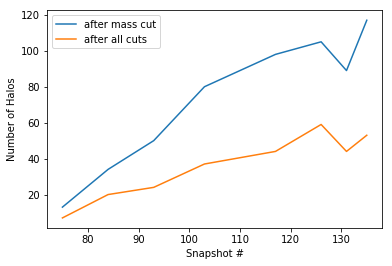

In [15]:
plt.plot(snaps,numberPairs_Mass,label='after mass cut')
plt.plot(snaps,numberPairs_Total,label='after all cuts')
plt.legend()
plt.xlabel('Snapshot #')
plt.ylabel('Number of Halos')
plt.savefig('plots_dwarfPairs/numberAnalogs.pdf')
plt.show()

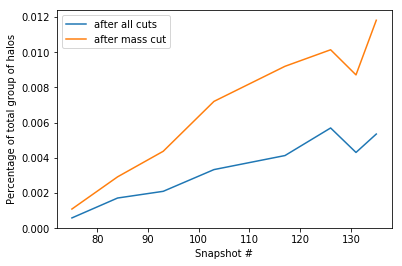

In [16]:
plt.plot(snaps,np.array(numberPairs_Total)/np.array(numberSubhaloPairs),label='after all cuts')
plt.plot(snaps,np.array(numberPairs_Mass)/np.array(numberSubhaloPairs),label='after mass cut')
plt.legend()
plt.xlabel('Snapshot #')
plt.ylabel('Percentage of total group of halos')
plt.savefig('plots_dwarfPairs/percentTotalAnalogs.pdf')
plt.show()

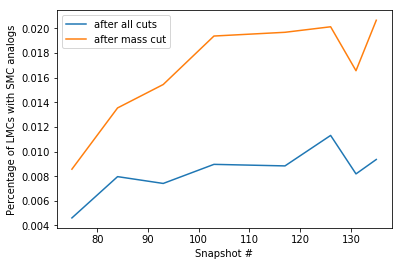

In [17]:
plt.plot(snaps,np.array(numberPairs_Total)/np.array(numberLMCs),label='after all cuts')
plt.plot(snaps,np.array(numberPairs_Mass)/np.array(numberLMCs),label='after mass cut')
plt.legend()
plt.xlabel('Snapshot #')
plt.ylabel('Percentage of LMCs with SMC analogs')
plt.savefig('plots_dwarfPairs/percentLMCAnalogs.pdf')
plt.show()

In [18]:
np.array([len(pd.read_csv(primFiles[i])['Mass at z=0']) for i in range(len(snaps))])


array([ 9901, 10215, 10355, 10651, 11100, 11431, 11638, 11893])

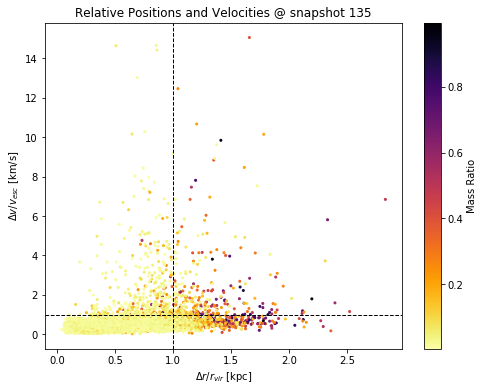

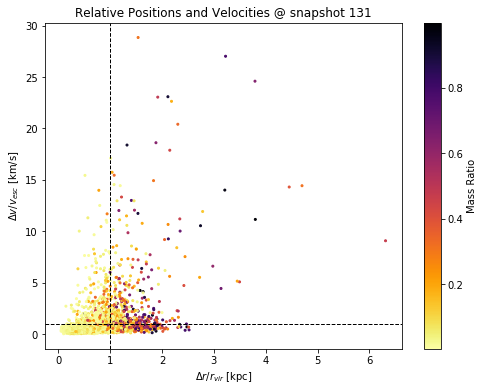

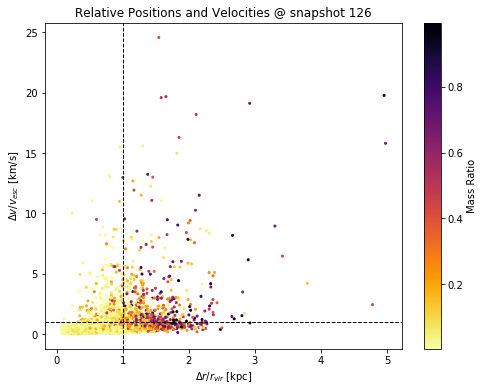

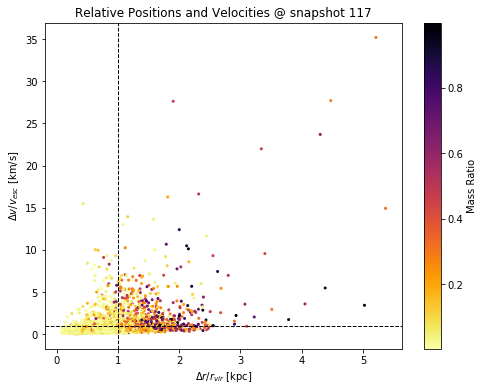

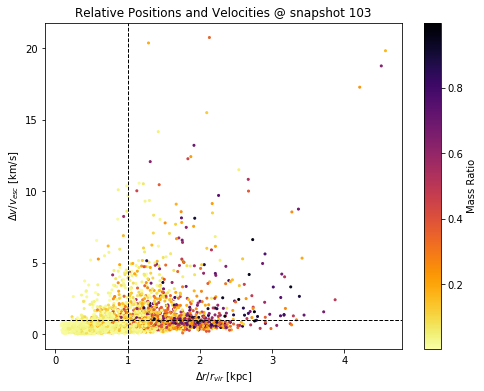

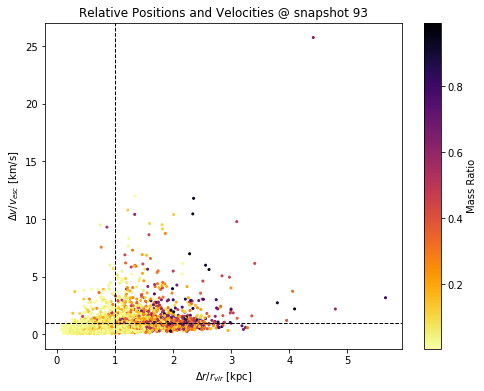

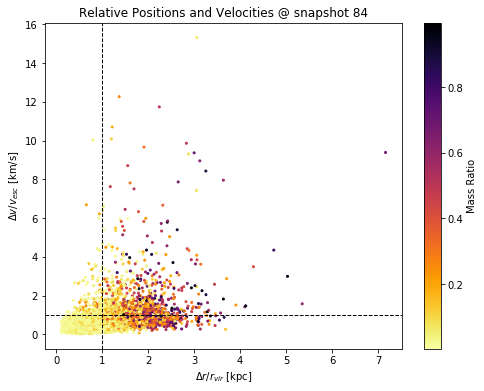

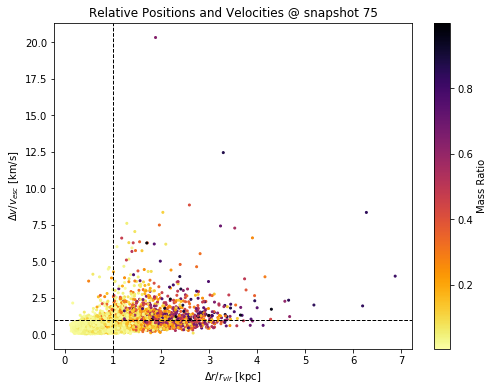

In [27]:
for i in range(len(snaps)):
    saveFile = 'plots_dwarfPairs/velocitySeparation_'+str(snaps[i])+'.pdf'
    scaledSeparation = scaledSeparations(pd.read_csv(primFiles[i]),pd.read_csv(secoFiles[i]))
    scaledVelocity = scaledVelocities(pd.read_csv(primFiles[i]),pd.read_csv(secoFiles[i]))
    
    massRatio = np.array(pd.read_csv(secoFiles[i])['Mass at z=0']/pd.read_csv(primFiles[i])['Mass at z=0'].values)
    fig,ax = plt.subplots(figsize=(8,6))
    scatterPlot = ax.scatter(scaledSeparation,scaledVelocity,c = massRatio, cmap = 'inferno_r', s=4)
    ax.set(xlabel=r'$\Delta r/r_{vir}$ [kpc]', ylabel=r'$\Delta v/v_{esc}$ [km/s]',title='Relative Positions and Velocities @ snapshot '+str(snaps[i]))
    plt.colorbar(scatterPlot,label="Mass Ratio")
    plt.axvline(1,color='black', linestyle='dashed',linewidth=1)
    plt.axhline(1,color='black', linestyle='dashed',linewidth=1)
    plt.savefig(saveFile)
    plt.show()
    
    